In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import pickle
import tensorflow as tf

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)
train.drop('label', axis = 1, inplace = True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
batch_size = 128
num_classes = 24
epochs = 50
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [3]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 3s 156us/sample - loss: 2.6747 - acc: 0.1822 - val_loss: 1.7599 - val_acc: 0.4483
Epoch 2/50
19218/19218 [==============================] - 2s 101us/sample - loss: 1.4171 - acc: 0.5342 - val_loss: 1.0486 - val_acc: 0.6504
Epoch 3/50
19218/19218 [==============================] - 2s 102us/sample - loss: 0.8441 - acc: 0.7157 - val_loss: 0.5993 - val_acc: 0.7973
Epoch 4/50
19218/19218 [==============================] - 2s 106us/sample - loss: 0.5549 - acc: 0.8102 - val_loss: 0.3749 - val_acc: 0.8751
Epoch 5/50
19218/19218 [==============================] - 2s 110us/sample - loss: 0.3925 - acc: 0.8666 - val_loss: 0.2811 - val_acc: 0.9104
Epoch 6/50
19218/19218 [==============================] - 2s 101us/sample - loss: 0.2683 - acc: 0.9115 - val_loss: 0.1509 - val_acc: 

In [4]:
model.save('SLI.model')

f = open("lables.pickle", "wb")
f.write(pickle.dumps(label_binrizer))
f.close()

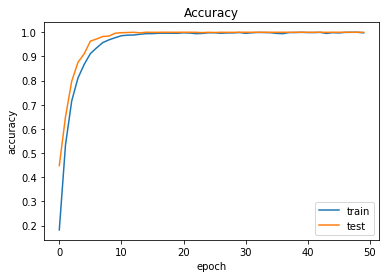

In [5]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"])
plt.show()

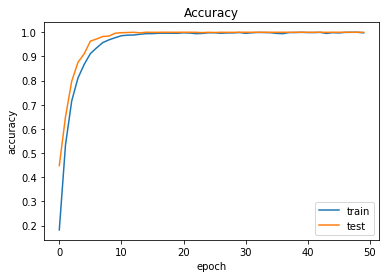

In [6]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"])
plt.show()

In [7]:
images

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])